#Getting the Prerequisites

In [ ]:
#Importing tensorflow and opencv
!pip install opencv-python
!pip install tensorflow

#Importing the Libraries

In [ ]:
#Importing the libraries
import numpy as np
import argparse
import cv2
import os
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import backend as K

In [ ]:
## constructing the argument parse and parse the arguments

ap = argparse.ArgumentParser()
ap.add_argument("-i", "--image", default="DEFAULT_DATASET.dat",
	help="path to input image")
ap.add_argument("-f", "--face", default="DEFAULT_DATASET.dat",
	help="path to face detector model directory")
ap.add_argument("-a", "--age", default="DEFAULT_DATASET.dat",
	help="path to age detector model directory")
ap.add_argument("-c", "--confidence", type=float, default=0.5,
	help="minimum probability to filter weak detections")
args = vars(ap.parse_args())

In [ ]:
# define the list of age buckets our age detector will predict
AGE_BUCKETS = ["(0-10)", "(10-17)", "(18-100)"]
gender_list = ['Male', 'Female']

In [ ]:
def load_caffe_models():
  age_net = cv2.dnn.readNetFromCaffe('deploy_age.prototxt', 'age_net.caffemodel')
  return(age_net)

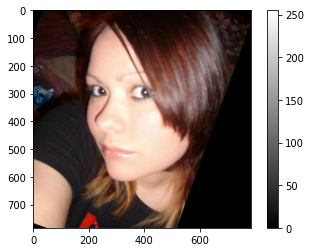

In [ ]:
#Loading a Test Image
from PIL import Image
import matplotlib.pyplot as plt
image = Image.open('000001.jpg')
array = np.array(image)
plt.imshow(array, cmap='gray')
plt.colorbar();

In [ ]:
# initialize the face recognizer (default face haar cascade)
face_cascade = cv2.CascadeClassifier("cascades/haarcascade_fontalface_default.xml")

In [ ]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


#Data Modelling

In [ ]:
#Create the model
batch_size = 7591
num_classes = 10
epochs = 10
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers,metrics=['accuracy'])

In [ ]:
#Training the model
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

In [ ]:
# convert class vectors to binary class matrices
from keras import utils as np_utils
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
import keras.utils
from keras import utils as np_utils
y_train = keras.utils.np_utils.to_categorical(y_train)
y_test = keras.utils.np_utils.to_categorical(y_test)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [ ]:
#Compiling the model
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
tf.keras.optimizers.Adam(x_train)
# opt = keras.optimizers.Adam(x_train)
model.compile(loss="categorical_crossentropy", metrics=model.compile(loss="categorical_crossentropy", metrics=['accuracy']))

In [ ]:
hist = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))
print("The model has successfully trained")

model.save('mnist.h5')
print("Saving the model as mnist.h5")

Epoch 1/10
8/8 [==============================] - 151s 18s/step - loss: 1.4689 - val_loss: 0.5104
Epoch 2/10
8/8 [==============================] - 139s 17s/step - loss: 0.5436 - val_loss: 0.3279
Epoch 3/10
8/8 [==============================] - 138s 17s/step - loss: 0.3723 - val_loss: 0.2467
Epoch 4/10
8/8 [==============================] - 138s 17s/step - loss: 0.2589 - val_loss: 0.2109
Epoch 5/10
8/8 [==============================] - 145s 18s/step - loss: 0.2128 - val_loss: 0.1738
Epoch 6/10
8/8 [==============================] - 139s 17s/step - loss: 0.2015 - val_loss: 0.1119
Epoch 7/10
8/8 [==============================] - 138s 17s/step - loss: 0.1610 - val_loss: 0.1047
Epoch 8/10
8/8 [==============================] - 141s 18s/step - loss: 0.1257 - val_loss: 0.1117
Epoch 9/10
8/8 [==============================] - 144s 18s/step - loss: 0.1240 - val_loss: 0.0834
Epoch 10/10
8/8 [==============================] - 140s 18s/step - loss: 0.1180 - val_loss: 0.0629
The model has succe

In [ ]:
#Evaluate the model
score = model.evaluate(x_test, y_test, verbose=0)
# print('Test loss:', score[0])
# print('Test accuracy:', score[1])
print(score)

0.0628775805234909


In [ ]:
#Making Predictions
def predict_digit(img):
    #resize image to 28x28 pixels
    img = img.resize((28,28))
    #reshaping to support our model input and normalizing
    img = img.reshape(1,28,28,1)
    img = img/255.0
    #predicting the class
    res = model.predict([img])[0]
    return np.argmax(res), max(res)